# Image Blurring and Sharpening

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noise. It actually removes high frequency content (eg: noise, edges) from the image.

There are a lot of different effects and filters we can apply to images. Most of them involve some sort of math based function being applied to all the pixels values.

[Smoothing Images](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)



## Importing

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Creating Image Display Function

In [2]:
def plot_image(image_1, image_2, title_1="Original", title_2="New Image"):
    plt.figure(figsize=(12, 12))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
    plt.title(title_2)
    plt.show()

## Loading the Image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


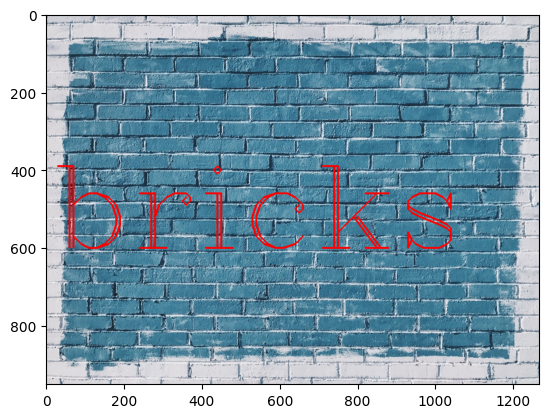

In [3]:
original = cv2.imread('../DATA/bricks.jpg').astype(np.float32) / 255
cv2.putText(original, text='bricks', org=(10, 600), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale= 10, color=(0, 0, 255), thickness=4)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))

## Blurring

OpenCV provides four main types of blurring techniques.

### Averaging

This is done by convolving an image with a normalized box filter. It simply takes the average of all the pixels under the kernel area and replaces the central element. This is done by the function `cv.blur`. We should specify the width and height of the kernel.

---

`cv2.blur(Mat src, Tuple[int, int] ksize, Mat dst=None, Tuple[int, int] anchor=(-1, -1), int borderType=cv2.BORDER_DEFAULT)`

**Description:** Blurs an image using the normalized box filter.

**Parameters:**

`src`: It is the image whose is to be blurred.

`ksize`: A tuple representing the blurring kernel size.

`dst`: It is the output image of the same size and type as src.

`anchor`:  It is a variable of type integer representing anchor point. Default is at the kernel center.

`borderType`: It depicts what kind of border to be added.

* `BORDER_CONSTANT`: `iiiiii|abcdefgh|iiiiiii` with some specified `i`
* `BORDER_REPLICATE`: `aaaaaa|abcdefgh|hhhhhhh`
* `BORDER_REFLECT`: `fedcba|abcdefgh|hgfedcb`
* `BORDER_WRAP`: `cdefgh|abcdefgh|abcdefg`
* and a few more...

**Return Value:** It returns an image.

---



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


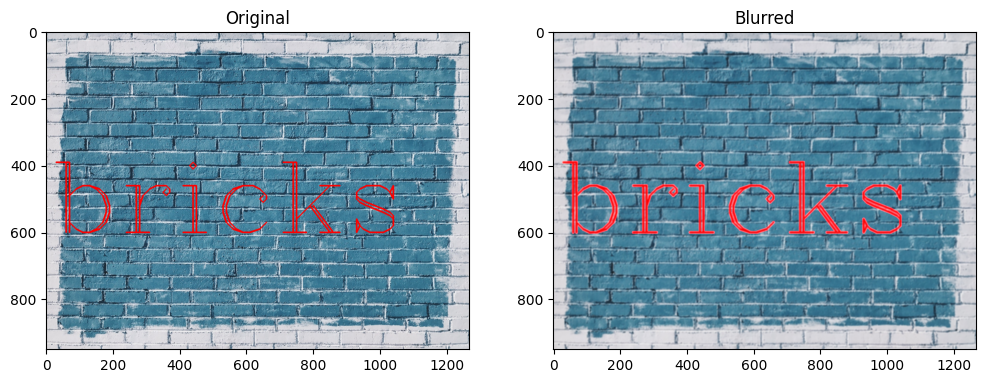

In [4]:
blurred = cv2.blur(original, ksize=(5, 5))
plot_image(original, blurred, "Original", "Blurred")

### Gaussian Blurring

In this method, instead of a box filter, a Gaussian kernel is used. It is done with the function, `cv.GaussianBlur`. We should specify the width and height of the kernel which should be positive and odd. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively. Gaussian blurring is highly effective in removing Gaussian noise from an image.

---

`cv2.GaussianBlur(Mat src, Tuple[int, int] ksize, Mat dst=None, double sigmaX=0, double sigmaY=0, int borderType=cv2.BORDER_DEFAULT)`

**Description:** Blurs an image using a Gaussian filter.

**Parameters:**

`src`: It is the image whose is to be blurred.

`ksize`: Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero's and then they are computed from sigma.

`dst`: It is the output image of the same size and type as src.

`sigmaX`: Gaussian kernel standard deviation in X direction.

`sigmaY`: Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height. It is recommended to specify all of ksize, sigmaX, and sigmaY.

`borderType`: It depicts what kind of border to be added.

* `BORDER_CONSTANT`: `iiiiii|abcdefgh|iiiiiii` with some specified `i`
* `BORDER_REPLICATE`: `aaaaaa|abcdefgh|hhhhhhh`
* `BORDER_REFLECT`: `fedcba|abcdefgh|hgfedcb`
* `BORDER_WRAP`: `cdefgh|abcdefgh|abcdefg`
* and a few more...

**Return Value:** It returns an image.

---

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


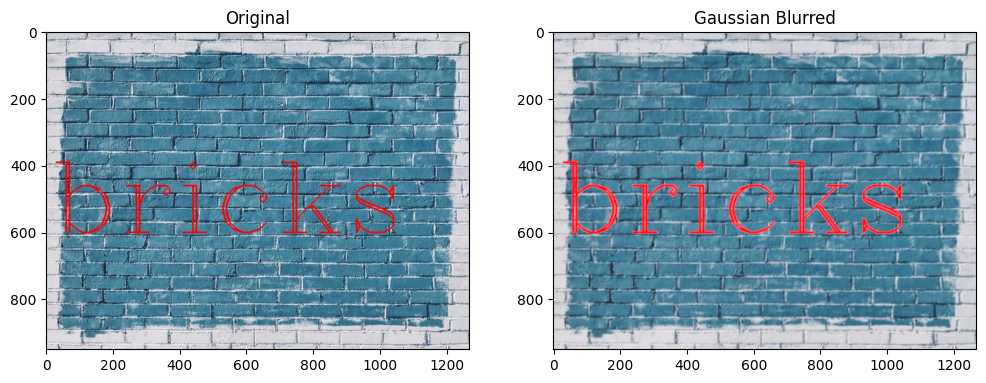

In [5]:
gaussian = cv2.GaussianBlur(original, (5, 5), 10)
plot_image(original, gaussian, "Original", "Gaussian Blurred")

### Median Blurring

Here, the function `cv.medianBlur` takes the median of all the pixels under the kernel area and the central element is replaced with this median value. This is highly effective against salt-and-pepper noise in an image. Interestingly, in the above filters, the central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, the central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

---

`cv2.medianBlur(Mat src, int ksize, Mat dst=None)`

**Description:** Blurs an image using the median filter.

**Parameters:**

`src`: It is the image whose is to be blurred.

`ksize`: Aperture linear size; it must be odd and greater than 1.

`dst`: It is the output image of the same size and type as src.

**Return Value:** It returns an image.

---


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


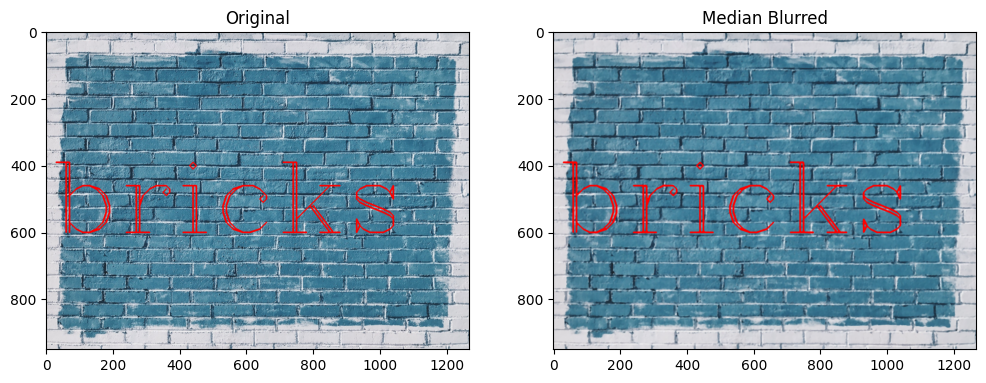

In [6]:
median = cv2.medianBlur(original, 5)
plot_image(original, median, "Original", "Median Blurred")

### Bilateral Filtering

`cv.bilateralFilter` is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that a Gaussian filter takes the neighbourhood around the pixel and finds its Gaussian weighted average. This Gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost the same intensity. It doesn't consider whether a pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

The Gaussian function of space makes sure that only nearby pixels are considered for blurring, while the Gaussian function of intensity difference makes sure that only those pixels with similar intensities to the central pixel are considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

---

`cv2.bilateralFilter(Mat src, int d, double sigmaColor, double sigmaSpace, Mat dst=None, int borderType=cv2.BORDER_DEFAULT)`

**Description:** Applies the bilateral filter to an image.

**Parameters:**

`src`: 	Source 8-bit or floating-point.

`d`: Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.

`sigmaColor`: Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood will be mixed together, resulting in larger areas of semi-equal color.

`sigmaSpace`: Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough. When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.

`dst`: Destination image of the same size and type as src.

`borderType`: It depicts what kind of border to be added.

* `BORDER_CONSTANT`: `iiiiii|abcdefgh|iiiiiii` with some specified `i`
* `BORDER_REPLICATE`: `aaaaaa|abcdefgh|hhhhhhh`
* `BORDER_REFLECT`: `fedcba|abcdefgh|hgfedcb`
* `BORDER_WRAP`: `cdefgh|abcdefgh|abcdefg`
* and a few more...

**Return Value:** It returns an image.

---

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


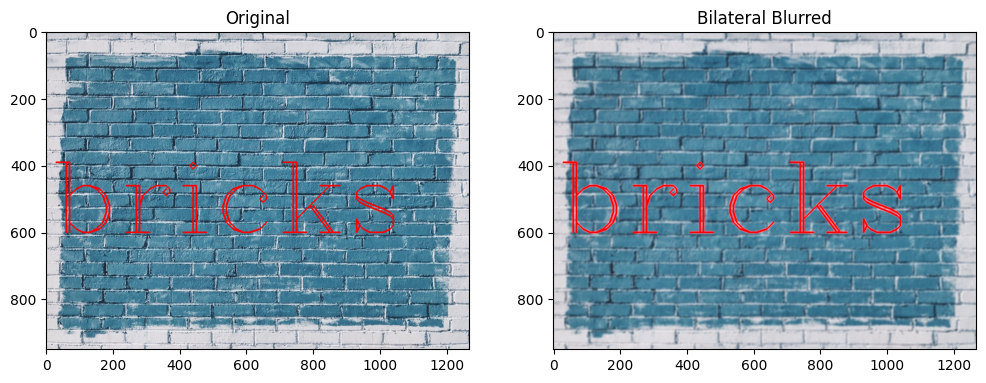

In [7]:
bilateral = cv2.bilateralFilter(original, 9, 75, 75)
plot_image(original, bilateral, "Original", "Bilateral Blurred")

### Custom Blurring

Convolution is a standard way to filter an image. The filter is called the kernel and different kernels perform different tasks. We simply take the dot product of the kernel and as an equally-sized portion of the image. We then shift the kernel and repeat.

A filtering operation known as 2D convolution can be used to create a low-pass filter. OpenCV provides a function `cv.filter2D` to convolve a kernel with an image.

---

`cv2.filter2D(Mat src, int ddepth, Mat kernel, Mat dst=None, Tuple[int, int] anchor=(-1, -1), double delta=0.0, int borderType=cv2.BORDER_DEFAULT)`

**Description:** Convolves an image with the kernel.

**Parameters:**

`src`: It is the image whose is to be blurred.

`ksize`: Desired depth of the destination image

`dst`: It is the output image of the same size and type as src.

`anchor`: It is a variable of type integer representing anchor point. Default is at the kernel center.

`delta`: Optional value added to the filtered pixels before storing them in dst.

`borderType`: It depicts what kind of border to be added.

* `BORDER_CONSTANT`: `iiiiii|abcdefgh|iiiiiii` with some specified `i`
* `BORDER_REPLICATE`: `aaaaaa|abcdefgh|hhhhhhh`
* `BORDER_REFLECT`: `fedcba|abcdefgh|hgfedcb`
* `BORDER_WRAP`: `cdefgh|abcdefgh|abcdefg`
* and a few more...

**Return Value:** It returns an image.

---


#### Create the Kernel

An image kernel is a small matrix used to apply effects like blurring, sharpening, outlining or embossing. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like the below:

$$  

K = \frac{1}{25} \begin{pmatrix}
  1 & 1 & 1 & 1 & 1\\
  1 & 1 & 1 & 1 & 1\\
  1 & 1 & 1 & 1 & 1\\
  1 & 1 & 1 & 1 & 1\\
  1 & 1 & 1 & 1 & 1
 \end{pmatrix}

 $$  


In [8]:
kernel = np.ones(shape=(5, 5), dtype=np.float32) / 25

#### Apply the Kernel

The operation works like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take the average, and replace the central pixel with the new average value. This operation is continued for all the pixels in the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


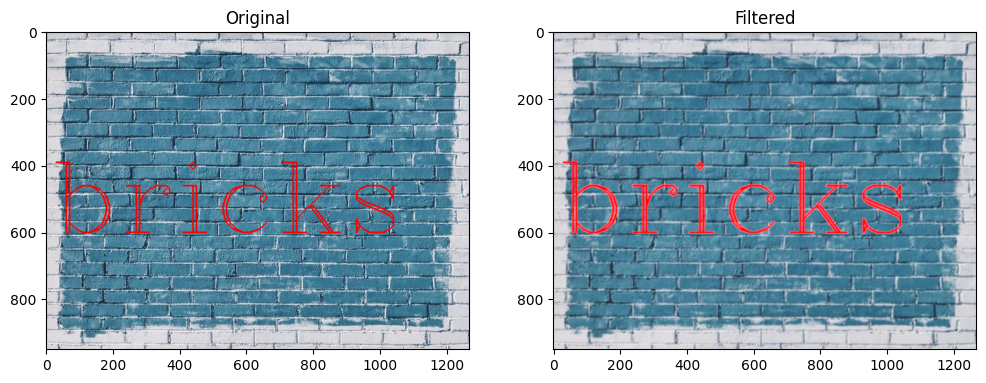

In [9]:
filtered = cv2.filter2D(original, -1, kernel)
plot_image(original, filtered, "Original", "Filtered")

## Sharpening

You can also sharpen an image with a 2D-convolution kernel. First define a custom 2D kernel, and then use the `cv.filter2D` function to apply the convolution operation to the image.

### Create the Kernel

In the code below, the 3×3 kernel defines a sharpening kernel.

$$  

K = \begin{pmatrix}
  -1 & -1 & -1\\
  -1 & 9 & -1\\
  -1 & -1 & -1
 \end{pmatrix}

$$

In [10]:
kernel = np.array([[-1, -1, -1],
                    [-1,  9, -1],
                    [-1, -1, -1]])

### Apply the Kernel

We finally apply the sharpening kernel.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


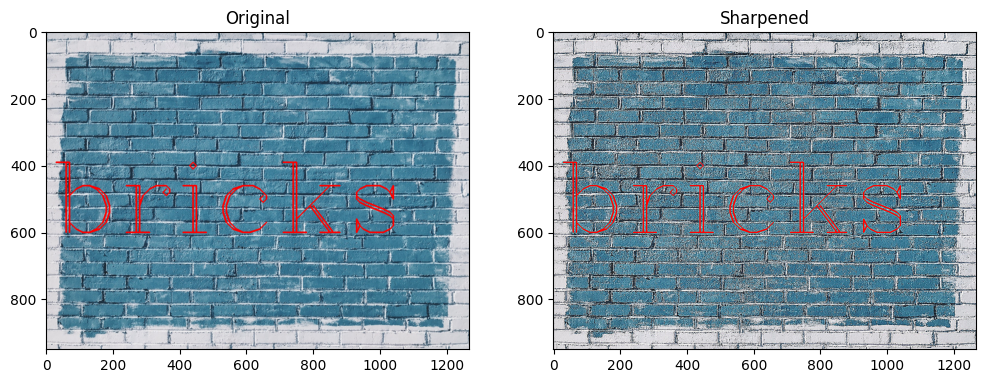

In [11]:
sharpened = cv2.filter2D(original, -1, kernel)
plot_image(original, sharpened, "Original", "Sharpened")